# Click-Through Rate Prediction

In [9]:
import numpy as np
import random
n = 40428967  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 

types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

In [10]:
import pandas as pd
import gzip

parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

with gzip.open('train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows = skip_values)

train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000169349117863715,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
1,10000949271186029916,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
2,10006490708516192015,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100083,79
3,10009190848778773294,0,2014-10-21,1005,1,5ee41ff2,17d996e6,f028772b,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,-1,117
4,10017640116993553715,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,100084,79


In [11]:
train.shape

(1000000, 24)

In [12]:
train.dtypes

id                          uint64
click                        int64
hour                datetime64[ns]
C1                           int64
banner_pos                   int64
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int64
device_conn_type             int64
C14                          int64
C15                          int64
C16                          int64
C17                          int64
C18                          int64
C19                          int64
C20                          int64
C21                          int64
dtype: object

Target feature -> click

site features -> site_id, site_domain, site_category

app feature -> app_id, app_domain, app_category

device feature -> device_id, device_ip, device_model, device_type, device_conn_type

anonymized categorical features -> C14-C21

In [13]:
train['click'].value_counts()

0    830004
1    169996
Name: click, dtype: int64

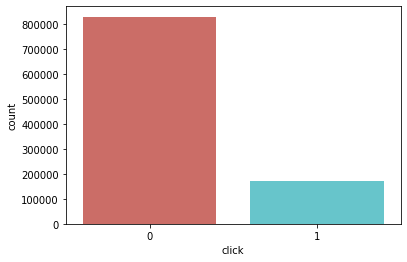

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='click',data=train, palette='hls')
plt.show();

In [15]:
train['click'].value_counts()/len(train)

0    0.830004
1    0.169996
Name: click, dtype: float64

Click through rate is approx. 17%, and approx. 83% is not clicked. 

In [16]:
train.hour.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    11243
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

The data covers 10 days of click streams data from 2014-10-21 to 2014-10-30, that is 240 hours.

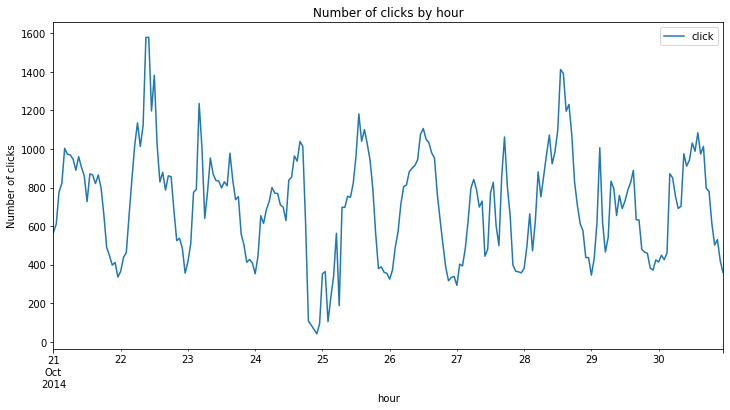

In [17]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

The hourly clicks pattern looks pretty similar every day. However, there were a couple of peak hours, one is sometime in the mid of the day on Oct 22, and another is sometime in the mid of the day on Oct 28. And one off-peak hour is close to mid-night on Oct 24.

###  Feature engineering for date time features

#### Hour

Extract hour from date time feature.

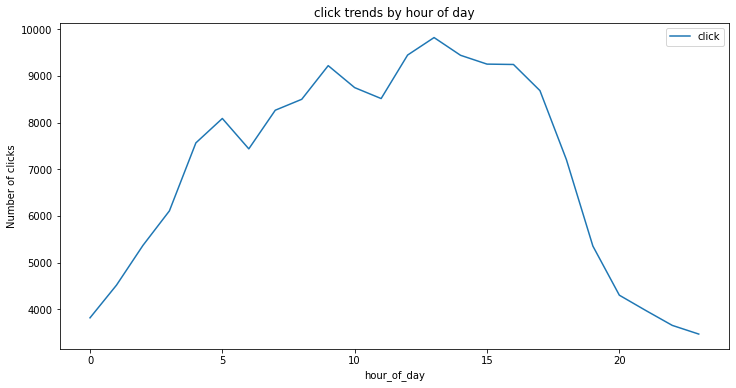

In [18]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

In general, the highest number of clicks is at hour 13 and 14 (1pm and 2pm), and the least number of clicks is at hour 0 (mid-night). It seems a useful feature for roughly estimation.

In [19]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day
0,10000169349117863715,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15704,320,50,1722,0,35,100084,79,0
1,10000949271186029916,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,2,15707,320,50,1722,0,35,-1,79,0
2,10006490708516192015,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15708,320,50,1722,0,35,100083,79,0


Let's take impressions into consideration.

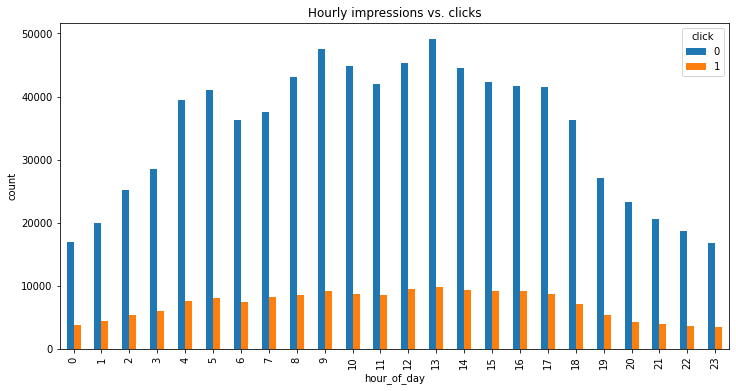

In [20]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

There is nothing shocking here.

In [21]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day
0,10000169349117863715,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15704,320,50,1722,0,35,100084,79,0
1,10000949271186029916,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,2,15707,320,50,1722,0,35,-1,79,0
2,10006490708516192015,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15708,320,50,1722,0,35,100083,79,0


Now that we have click and impression. We can calculate Click-through rate (CTR). CTR is the ratio of ad clicks to impressions. It measures the rate of clicks on each ad.

#### Hourly CTR

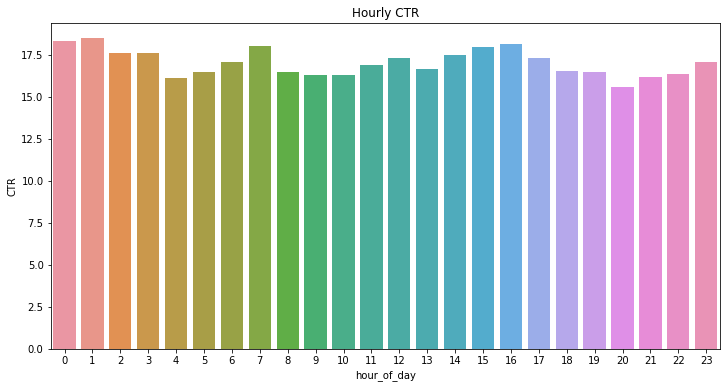

In [22]:
import seaborn as sns

df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

One of the interesting observations here is that the highest CTR happened in the hour of mid-night, 1, 7 and 15. If you remember, around mid-night has the least number of impressions and clicks.

#### Day of week

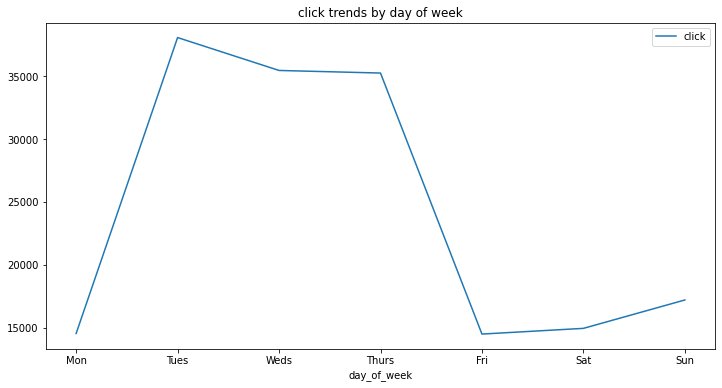

In [23]:
train['day_of_week'] = train['hour'].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

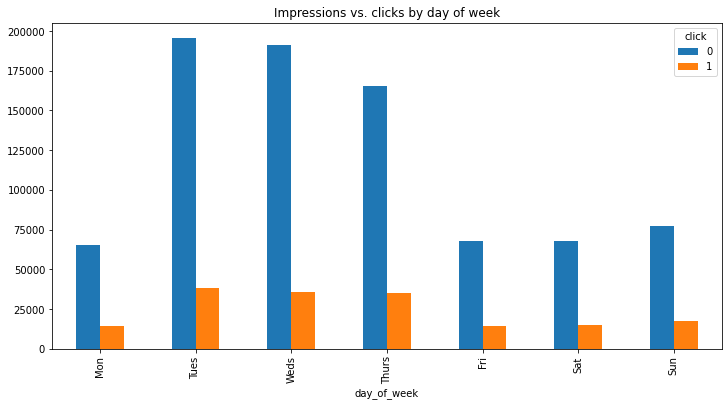

In [24]:
train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

Tuesdays have the most impressions and clicks, then Wednesdays, followed by Thursdays. Mondays and Fridays have the least number of impressions and clicks.

#### Day of week CTR

In [25]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,10000169349117863715,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,100084,79,0,Tuesday
1,10000949271186029916,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15707,320,50,1722,0,35,-1,79,0,Tuesday
2,10006490708516192015,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15708,320,50,1722,0,35,100083,79,0,Tuesday


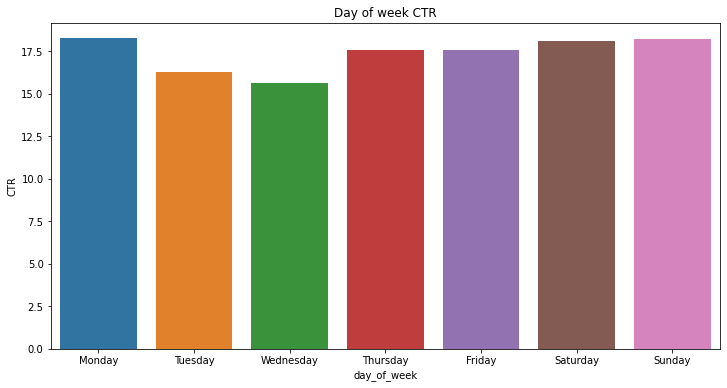

In [26]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

While Tuesdays and Wednesdays have the highest number of impressions and clicks, their CTR are among the lowest. Saturdays and Sundays enjoy the highest CTR. Apparently, people have more time to click over the weekend.

In [27]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,10000169349117863715,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,100084,79,0,Tuesday
1,10000949271186029916,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15707,320,50,1722,0,35,-1,79,0,Tuesday
2,10006490708516192015,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15708,320,50,1722,0,35,100083,79,0,Tuesday


### C1 feature

C1 is one of the anonymized categorical features. Although we don't know its meaning, we still want to have a look its distribution.

In [28]:
print(train.C1.value_counts()/len(train))

1005    0.918632
1002    0.054794
1010    0.022537
1012    0.002763
1007    0.000870
1001    0.000251
1008    0.000153
Name: C1, dtype: float64


C1 value = 1005 has the most data, almost 92%. Let's see whether we can find value of C1 indicates something about CTR.

In [29]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.027888446215139442
for C1 value: 1002,  click through rate: 0.2108442530204037
for C1 value: 1005,  click through rate: 0.16960545680969094
for C1 value: 1007,  click through rate: 0.03333333333333333
for C1 value: 1008,  click through rate: 0.1503267973856209
for C1 value: 1010,  click through rate: 0.09220393131295203
for C1 value: 1012,  click through rate: 0.18132464712269272


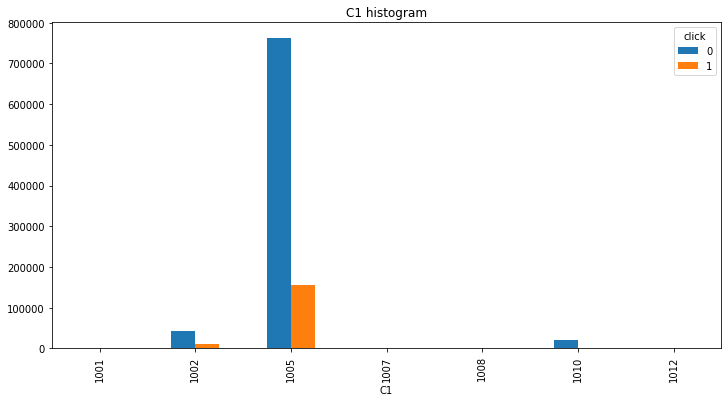

In [30]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

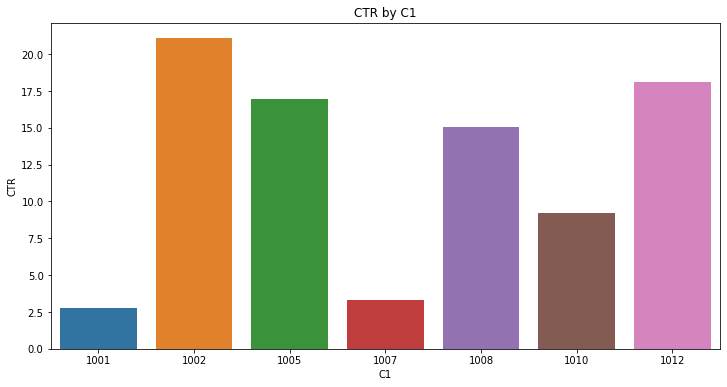

In [31]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

The average CTR in the data is 0.17.

In [32]:
train['click'].mean()

0.169996

In [33]:
df_c1.CTR.describe()

count     7.000000
mean     12.364670
std       7.310835
min       2.788845
25%       6.276863
50%      15.032680
75%      17.546505
max      21.084425
Name: CTR, dtype: float64

The important C1 values and CTR pairs are:

1005: 92% of the data and 0.17 CTR

1002: 5.5% of the data and 0.21 CTR

1010: 2.3% of the data and 0.096 CTR

1002 has a much higher than average CTR, and 1010 has a much lower than average CTR, it seems these two C1 values are important for predicting CTR.

### Banner position

I have heard that there are many factors that affect the performance of your banner ads, but the most influential one is the banner position. Let's see whether it is true.

In [34]:
print(train.banner_pos.value_counts()/len(train))

0    0.718980
1    0.279158
7    0.001123
2    0.000349
4    0.000197
5    0.000153
3    0.000040
Name: banner_pos, dtype: float64


In [35]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16455256057192133
for banner position: 1,  click through rate: 0.18356271358872037
for banner position: 2,  click through rate: 0.14613180515759314
for banner position: 3,  click through rate: 0.175
for banner position: 4,  click through rate: 0.14213197969543148
for banner position: 5,  click through rate: 0.1503267973856209
for banner position: 7,  click through rate: 0.29741763134461263


The important banner positions are:

position 0: 72% of the data and 0.16 CTR

position 1: 28% of the data and 0.18 CTR

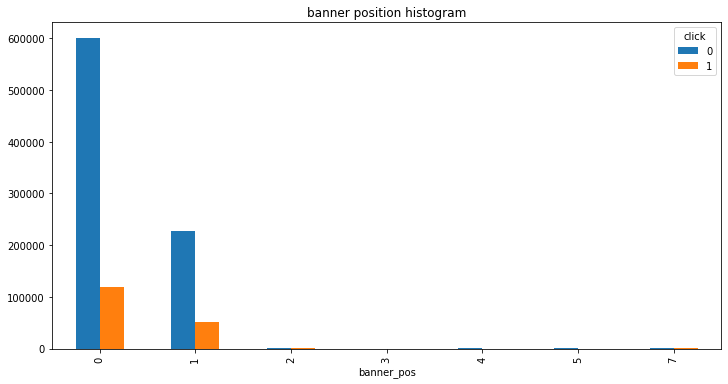

In [36]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

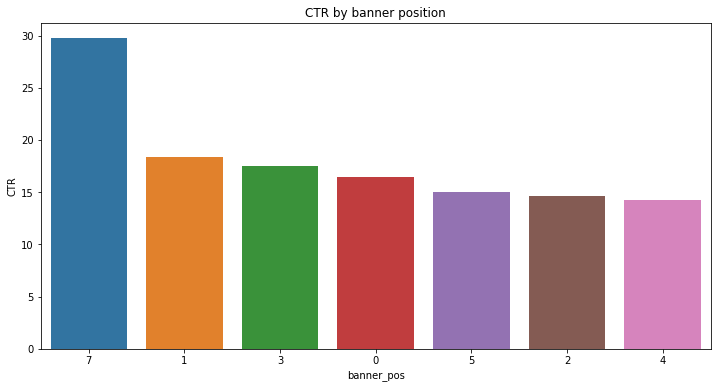

In [37]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [38]:
df_banner.CTR.describe()

count     7.000000
mean     17.987478
std       5.404419
min      14.213198
25%      14.822930
50%      16.455256
75%      17.928136
max      29.741763
Name: CTR, dtype: float64

Although banner position 0 and 1 have the highest number of impressions and clicks, banner 7 enjoys the highest click through rate. Increasing the number of ads placed on banner position 7 seems to be a good idea.

### Site features

#### site id

In [39]:
print("There are {} sites in the data set".format(train.site_id.nunique()))

There are 2620 sites in the data set


In [40]:
print('The top 10 site ids that have the most impressions')
print((train.site_id.value_counts()/len(train))[0:10])

The top 10 site ids that have the most impressions
85f751fd    0.360495
1fbe01fe    0.160160
e151e245    0.065051
d9750ee7    0.024041
5b08c53b    0.022550
5b4d2eda    0.018985
856e6d3f    0.018927
a7853007    0.011593
b7e9786d    0.009125
5ee41ff2    0.008774
Name: site_id, dtype: float64


In [41]:
top10_ids = (train.site_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_ids:
    click_avg=train.loc[np.where((train.site_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site id value: {},  click through rate: {}".format(i,click_avg))

for site id value: 85f751fd,  click through rate: 0.11891704461920415
for site id value: 1fbe01fe,  click through rate: 0.20574425574425576
for site id value: e151e245,  click through rate: 0.2951376612196584
for site id value: d9750ee7,  click through rate: 0.27981365167838274
for site id value: 5b08c53b,  click through rate: 0.46966740576496674
for site id value: 5b4d2eda,  click through rate: 0.1341058730576771
for site id value: 856e6d3f,  click through rate: 0.04464521582923865
for site id value: a7853007,  click through rate: 0.10100922970758217
for site id value: b7e9786d,  click through rate: 0.07375342465753425
for site id value: 5ee41ff2,  click through rate: 0.3288124002735354


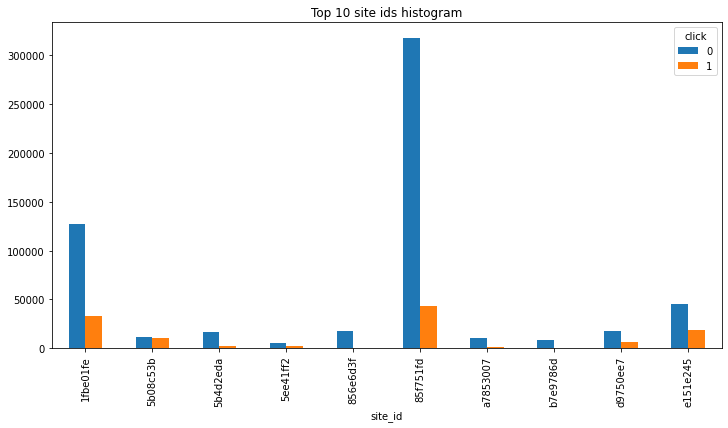

In [42]:
top10_sites = train[(train.site_id.isin((train.site_id.value_counts()/len(train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site ids histogram');

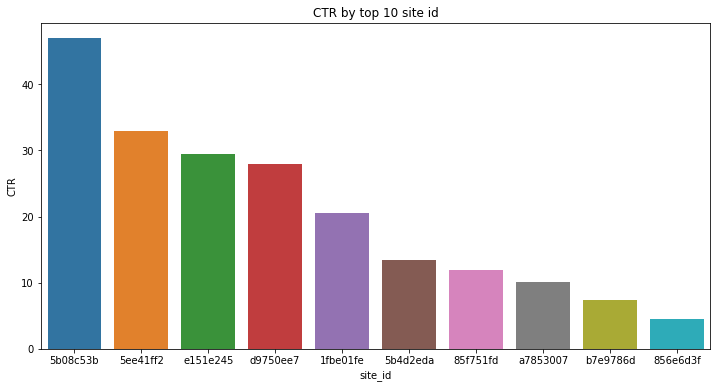

In [43]:
df_site = top10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns={'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks']/df_site['impressions']*100
sort_site = df_site.sort_values(by='CTR',ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_site, order=sort_site)
plt.title('CTR by top 10 site id');

The site_id feature seems important because the CTR for the top 10 sites, some as high as 0.47, and some as low as 0.04, and they are significantly different from overall CTR 0.16.

#### site domain 

In [44]:
print("There are {} site domains in the data set".format(train.site_domain.nunique()))

There are 2828 site domains in the data set


In [45]:
print('The top 10 site domains that have the most impressions')
print((train.site_domain.value_counts()/len(train))[0:10])

The top 10 site domains that have the most impressions
c4e18dd6    0.373575
f3845767    0.160160
7e091613    0.082280
7687a86e    0.031991
98572c79    0.024842
16a36ef3    0.021070
58a89a43    0.018927
9d54950b    0.009489
b12b9f85    0.009238
17d996e6    0.008891
Name: site_domain, dtype: float64


In [46]:
top10_domains = (train.site_domain.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_domains:
    click_avg=train.loc[np.where((train.site_domain == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i,click_avg))

for site domain value: c4e18dd6,  click through rate: 0.12286154052064512
for site domain value: f3845767,  click through rate: 0.20574425574425576
for site domain value: 7e091613,  click through rate: 0.25692756441419545
for site domain value: 7687a86e,  click through rate: 0.462911443843581
for site domain value: 98572c79,  click through rate: 0.27465582481281703
for site domain value: 16a36ef3,  click through rate: 0.14560987185571903
for site domain value: 58a89a43,  click through rate: 0.04464521582923865
for site domain value: 9d54950b,  click through rate: 0.10759827168300137
for site domain value: b12b9f85,  click through rate: 0.07436674604892834
for site domain value: 17d996e6,  click through rate: 0.32695984703632885


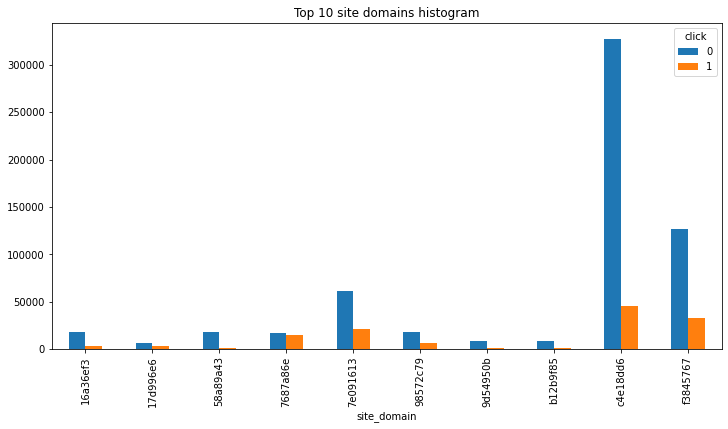

In [47]:
top10_domain = train[(train.site_domain.isin((train.site_domain.value_counts()/len(train))[0:10].index))]
top10_domain_click = top10_domain[top10_domain['click'] == 1]
top10_domain.groupby(['site_domain', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site domains histogram');

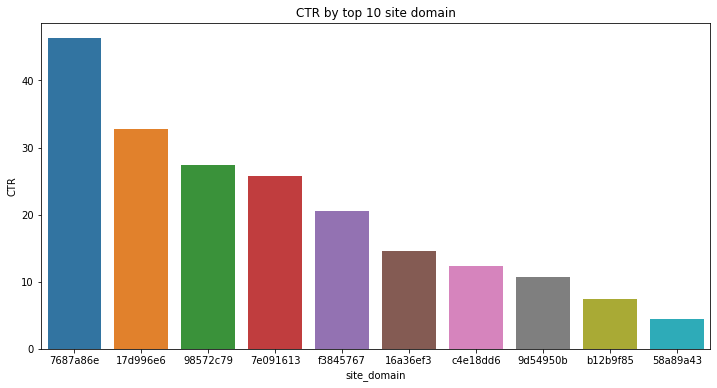

In [48]:
df_domain = top10_domain[['site_domain','click']].groupby(['site_domain']).count().reset_index()
df_domain = df_domain.rename(columns={'click': 'impressions'})
df_domain['clicks'] = top10_domain_click[['site_domain','click']].groupby(['site_domain']).count().reset_index()['click']
df_domain['CTR'] = df_domain['clicks']/df_domain['impressions']*100
sort_domain = df_domain.sort_values(by='CTR',ascending=False)['site_domain'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_domain', data=df_domain, order=sort_domain)
plt.title('CTR by top 10 site domain');

Similar with the site_id feature, the site_domain feature seems important as well.

#### site category

In [49]:
print("There are {} site categories in the data set".format(train.site_category.nunique()))

There are 22 site categories in the data set


In [50]:
print('The top 10 site categories that have the most impressions')
print((train.site_category.value_counts()/len(train))[0:10])

The top 10 site categories that have the most impressions
50e219e0    0.408365
f028772b    0.313903
28905ebd    0.182215
3e814130    0.075585
f66779e6    0.006228
75fa27f6    0.004013
335d28a8    0.003389
76b2941d    0.002515
c0dd3be3    0.001079
72722551    0.000701
Name: site_category, dtype: float64


In [51]:
top10_categories = (train.site_category.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_categories:
    click_avg=train.loc[np.where((train.site_category == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site category value: {},  click through rate: {}".format(i,click_avg))

for site category value: 50e219e0,  click through rate: 0.12870348830090728
for site category value: f028772b,  click through rate: 0.1795618391668764
for site category value: 28905ebd,  click through rate: 0.2082814257882172
for site category value: 3e814130,  click through rate: 0.28315141893232787
for site category value: f66779e6,  click through rate: 0.04271034039820167
for site category value: 75fa27f6,  click through rate: 0.10939446797906803
for site category value: 335d28a8,  click through rate: 0.09383298908232517
for site category value: 76b2941d,  click through rate: 0.024254473161033796
for site category value: c0dd3be3,  click through rate: 0.11492122335495829
for site category value: 72722551,  click through rate: 0.07703281027104136


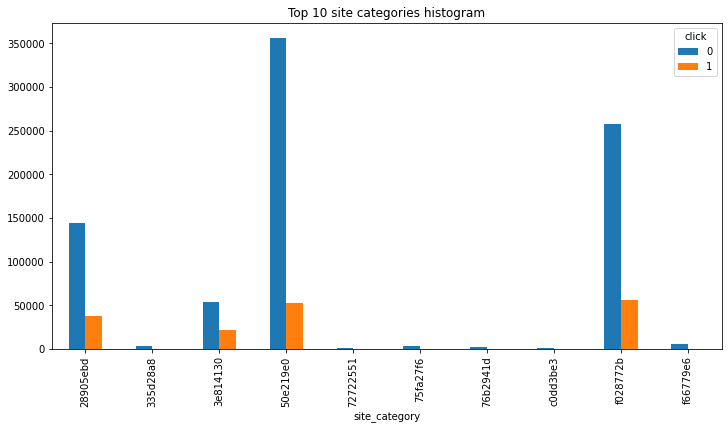

In [52]:
top10_category = train[(train.site_category.isin((train.site_category.value_counts()/len(train))[0:10].index))]
top10_category_click = top10_category[top10_category['click'] == 1]
top10_category.groupby(['site_category', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site categories histogram');

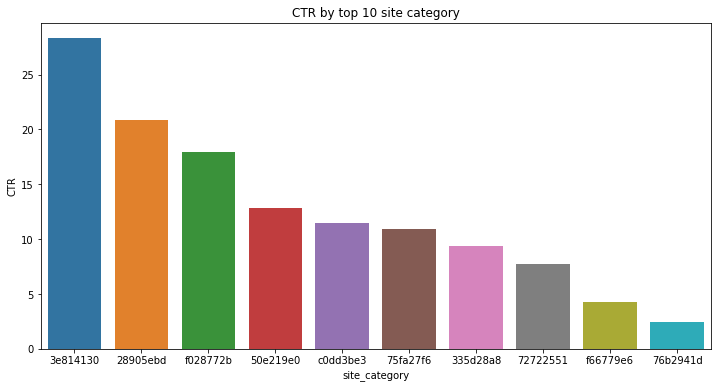

In [53]:
df_category = top10_category[['site_category','click']].groupby(['site_category']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_category_click[['site_category','click']].groupby(['site_category']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['site_category'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_category', data=df_category, order=sort_category)
plt.title('CTR by top 10 site category');

### Device features

#### device id

In [54]:
print("There are {} devices in the data set".format(train.device_id.nunique()))

There are 150179 devices in the data set


In [55]:
print('The top 10 devices that have the most impressions')
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions
a99f214a    0.825132
0f7c61dc    0.000501
c357dbff    0.000495
936e92fb    0.000320
afeffc18    0.000249
987552d1    0.000114
28dc8687    0.000099
d857ffbb    0.000086
3cdb4052    0.000082
cef4c8cc    0.000079
Name: device_id, dtype: float64


In [56]:
top10_devices = (train.device_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: a99f214a,  click through rate: 0.1743102921714344
for device id value: 0f7c61dc,  click through rate: 0.7584830339321357
for device id value: c357dbff,  click through rate: 0.6363636363636364
for device id value: 936e92fb,  click through rate: 0.071875
for device id value: afeffc18,  click through rate: 0.24497991967871485
for device id value: 987552d1,  click through rate: 0.0
for device id value: 28dc8687,  click through rate: 0.0
for device id value: d857ffbb,  click through rate: 0.2558139534883721
for device id value: 3cdb4052,  click through rate: 0.7195121951219512
for device id value: cef4c8cc,  click through rate: 0.21518987341772153


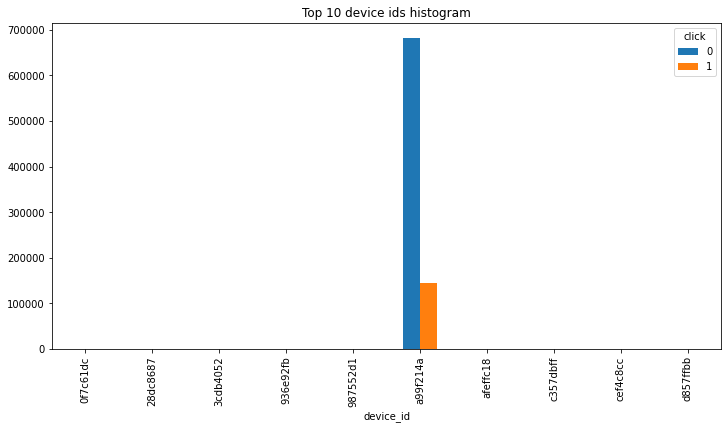

In [57]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 device ids histogram');

You will see that most of device_id is a99f214a : Approx. 83% of the data, and the second major device_id is only 0.05% of the data. And there are some extremely high CTR here with device id at 0f7c61dc.

#### device ip

Device ip is more of a users ip address, so, there are a lot of them.

In [58]:
print("There are {} device ips in the data set".format(train.device_ip.nunique()))
print("There are {} device types in the data set".format(train.device_type.nunique()))
print("There are {} device models in the data set".format(train.device_model.nunique()))
print("There are {} device cnn types in the data set".format(train.device_conn_type.nunique()))

There are 554637 device ips in the data set
There are 5 device types in the data set
There are 5147 device models in the data set
There are 4 device cnn types in the data set


#### device type

In [59]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    0.922668
0    0.054794
4    0.019289
5    0.003248
2    0.000001
Name: device_type, dtype: float64


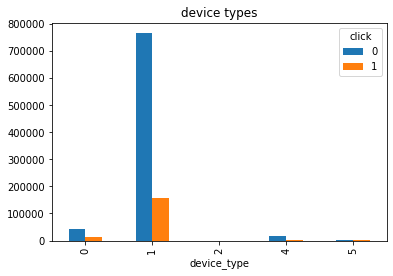

In [60]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

Device type 1 gets the most impressions and clicks. And the other device types only get the minimum impressions and clicks. We may want to look in more details about device type 1. 

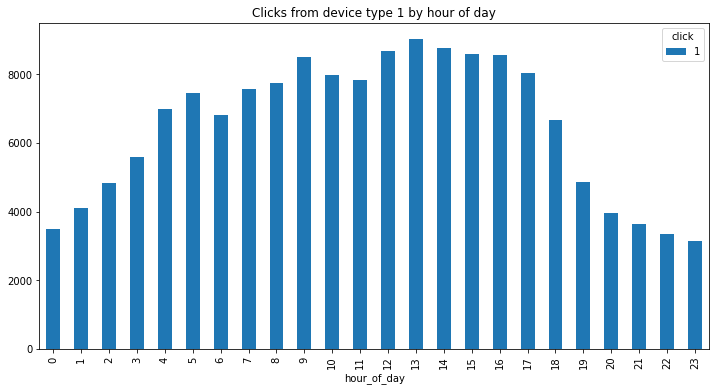

In [61]:
df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

As expected, most clicks happened during the business hours from device type 1. device type is definitely an important feature. 

In [62]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')

In [63]:
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100

In [64]:
merged_device_type

,device_type,click,impressions,CTR
0,0,11553,54794,21.084425
1,1,156365,922668,16.947049
2,4,1773,19289,9.191767
3,5,305,3248,9.390394


The highest CTR comes from device type 0.

#### app features

In [65]:
print("There are {} apps in the data set".format(train.app_id.nunique()))
print("There are {} app domains in the data set".format(train.app_domain.nunique()))
print("There are {} app categories in the data set".format(train.app_category.nunique()))

There are 3157 apps in the data set
There are 201 app domains in the data set
There are 26 app categories in the data set


Looks like app category something worth to explore.

In [66]:
print('The impressions by app categories')
print((train.app_category.value_counts()/len(train)))

The impressions by app categories
07d7df22    0.647784
0f2161f8    0.236207
cef3e649    0.042539
8ded1f7a    0.036451
f95efa07    0.027974
d1327cf5    0.003068
dc97ec06    0.001383
09481d60    0.001332
75d80bbe    0.000981
fc6fa53d    0.000589
4ce2e9fc    0.000560
879c24eb    0.000353
a3c42688    0.000278
0f9a328c    0.000139
4681bb9d    0.000137
a86a3e89    0.000064
2281a340    0.000053
8df2e842    0.000039
79f0b860    0.000022
0bfbc358    0.000012
18b1e0be    0.000010
7113d72a    0.000008
a7fd01ec    0.000007
5326cf99    0.000005
2fc4f2aa    0.000004
4b7ade46    0.000001
Name: app_category, dtype: float64


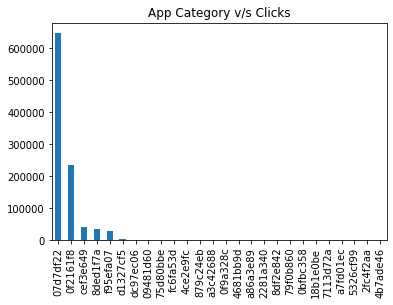

In [67]:
train['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')

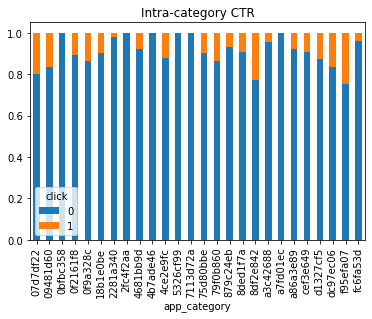

In [68]:
train_app_category = train.groupby(['app_category', 'click']).size().unstack()
train_app_category.div(train_app_category.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title="Intra-category CTR");

#### C14 - C21 features

In [69]:
print("There are {} C14 in the data set".format(train.C14.nunique()))
print("There are {} C15 in the data set".format(train.C15.nunique()))
print("There are {} C16 in the data set".format(train.C16.nunique()))
print("There are {} C17 in the data set".format(train.C17.nunique()))
print("There are {} C18 in the data set".format(train.C18.nunique()))
print("There are {} C19 in the data set".format(train.C19.nunique()))
print("There are {} C20 in the data set".format(train.C20.nunique()))

There are 2241 C14 in the data set
There are 8 C15 in the data set
There are 9 C16 in the data set
There are 421 C17 in the data set
There are 4 C18 in the data set
There are 66 C19 in the data set
There are 165 C20 in the data set


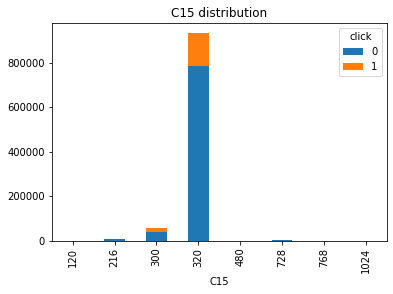

In [70]:
train.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C15 distribution');

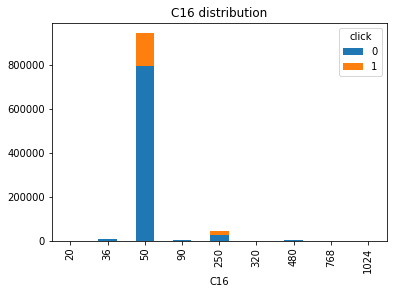

In [71]:
train.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C16 distribution');

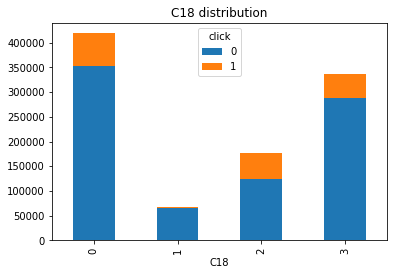

In [72]:
train.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C18 distribution');

In [73]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,10000169349117863715,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,100084,79,0,Tuesday
1,10000949271186029916,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15707,320,50,1722,0,35,-1,79,0,Tuesday
2,10006490708516192015,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15708,320,50,1722,0,35,100083,79,0,Tuesday


In [74]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

In [75]:
train.head(3)

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int
0,10000169349117863715,0,2014-10-21,1005,0,1,0,15704,320,50,...,-6492404588058177298,-5748729732776153338,1188275612966111309,-3947281355349736064,-3235331193927620979,-5119503289890858689,-3345723759739639550,7474278078898007007,6555686221842870964,-9047360984727327071
1,10000949271186029916,1,2014-10-21,1005,0,1,2,15707,320,50,...,-6492404588058177298,-5748729732776153338,1188275612966111309,-3947281355349736064,-3235331193927620979,-5119503289890858689,-3345723759739639550,-7610831833265139283,4412388564677982882,-9047360984727327071
2,10006490708516192015,1,2014-10-21,1005,0,1,0,15708,320,50,...,-6492404588058177298,-5748729732776153338,1188275612966111309,-3947281355349736064,-3235331193927620979,-5119503289890858689,-3345723759739639550,-508124159587015338,-3558627641197817301,-9047360984727327071


## Building Models 

In [76]:
train.drop('hour', axis=1, inplace=True)

In [77]:
train.drop('id', axis=1, inplace=True)

### LightGBM


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'click'], 
                                                    train['click'], 
                                                    test_size=0.3, random_state=42)

In [214]:
# build the lightgbm model
import lightgbm as lgb


clf = lgb.LGBMClassifier(
    task='train',
    boosting_type='gbdt',
    objective='binary',
    num_leaves=31, # defauly leaves(31) amount for each tree
    learning_rate=0.08,
    feature_fraction=0.7, # will select 70% features before training each tree
    bagging_fraction=0.3, #feature_fraction, but this will random select part of data
    bagging_freq=5, #  perform bagging at every 5 iteration
    verbose=0
)
clf.fit(X_train, y_train)


# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8332


In [108]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [114]:
%%capture
!pip install wandb

In [126]:
import wandb
from wandb.lightgbm import wandb_callback, log_summary

wandb.login(key='9fca47a5983b55ebf003ea317406ba18bf66b182')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [212]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}

wandb.init(project="ctr", entity="keeea");



print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=lgb_eval,
                early_stopping_rounds=500,
                callbacks=[wandb_callback()])

SyntaxError: ignored

In [130]:
print(gbm.best_score)


defaultdict(<class 'dict'>, {'valid_0': {'binary_logloss': 0.40051586188417493}})


In [131]:
print(gbm.best_iteration)

1032


In [134]:
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)


from sklearn.metrics import mean_squared_error
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
wandb.log({'rmse_prediction': mean_squared_error(y_test, y_pred) ** 0.5})

The rmse of prediction is: 0.35401155326778966


In [202]:
from sklearn.metrics import accuracy_score

987231    0
79954     0
567130    0
500891    0
55399     0
         ..
463299    1
728324    0
76260     0
77813     0
718205    0
Name: click, Length: 300000, dtype: int64

### XGboost with Spark

Set up Spark.

In [83]:
!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.16-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
--2022-04-16 05:28:52--  https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz.3’

spark-3.1.2-bin-had 100%[===================>] 218.23M  28.6MB/s    in 8.3s    

2022-04-16 05:29:01 (26.2 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz.3’ saved [228834641/228834641]



In [84]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('ml-hw4').getOrCreate()

In [85]:
%load_ext sparkmagic.magics

In [86]:
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd

import os
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [87]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

In [81]:
#df = train.drop(['id', 'hour'], axis=1, inplace=False)
#df = df.sample(n=100000)
df = train.sample(n=100000)

In [88]:
schema = StructType([StructField('click',StringType(),True),
                     StructField('C1',StringType(),True),
                     StructField('banner_pos',StringType(),True),
                     StructField('site_id',StringType(),True),
                     StructField('site_domain',StringType(),True),
                     StructField('site_category',StringType(),True),
                     StructField('app_id',StringType(),True),
                     StructField('app_domain',StringType(),True),
                     StructField('app_category',StringType(),True),
                     StructField('device_id',StringType(),True),
                     StructField('device_ip',StringType(),True),
                     StructField('device_model',StringType(),True),
                     StructField('device_type',StringType(),True),
                     StructField('device_conn_type',StringType(),True),
                     StructField('C14',StringType(),True),
                     StructField('C15',StringType(),True),
                     StructField('C16',StringType(),True),
                     StructField('C17',StringType(),True),
                     StructField('C18',StringType(),True),
                     StructField('C19',StringType(),True),
                     StructField('C20',StringType(),True),
                     StructField('C21',StringType(),True),
                     StructField('hour_of_day',StringType(),True),
                     StructField('day_of_week',StringType(),True)])


sdf = spark.createDataFrame(df, schema=schema) 

In [89]:
!pip install git+https://github.com/sllynn/spark-xgboost

  Cloning https://github.com/sllynn/spark-xgboost to /tmp/pip-req-build-2wbpcmho
  Running command git clone -q https://github.com/sllynn/spark-xgboost /tmp/pip-req-build-2wbpcmho


In [90]:

# Code taken from https://github.com/sllynn/spark-xgboost/blob/master/examples/spark-xgboost_adultdataset.ipynb
from sparkxgb import XGBoostClassifier, XGBoostRegressor
from pprint import PrettyPrinter
 
from pyspark.sql.types import StringType
 
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
pp = PrettyPrinter()
 
col_names = df.columns
 
train_sdf, test_sdf = sdf.toDF(*col_names).repartition(200).randomSplit([0.8, 0.2])

In [95]:
string_columns = [fld.name for fld in train_sdf.schema.fields if isinstance(fld.dataType, StringType)]
string_col_replacements = [fld + "_ix" for fld in string_columns]
string_column_map=list(zip(string_columns, string_col_replacements))
target = string_col_replacements[0]
predictors = [fld.name for fld in train_sdf.schema.fields if not isinstance(fld.dataType, StringType)] + string_col_replacements[1:]
pp.pprint(
  dict(
    string_column_map=string_column_map,
    target_variable=target,
    predictor_variables=predictors
  )
)

{'predictor_variables': ['C1_ix',
                         'banner_pos_ix',
                         'device_type_ix',
                         'device_conn_type_ix',
                         'C14_ix',
                         'C15_ix',
                         'C16_ix',
                         'C17_ix',
                         'C18_ix',
                         'C19_ix',
                         'C20_ix',
                         'C21_ix',
                         'hour_of_day_ix',
                         'site_id_int_ix',
                         'site_domain_int_ix',
                         'site_category_int_ix',
                         'app_id_int_ix',
                         'app_domain_int_ix',
                         'app_category_int_ix',
                         'device_id_int_ix',
                         'device_ip_int_ix',
                         'device_model_int_ix',
                         'day_of_week_int_ix'],
 'string_column_map': [('click', 'click_ix'),
   

In [96]:
# StringIndexer
si = [StringIndexer(inputCol=fld[0], outputCol=fld[1]) for fld in string_column_map]
# VectorAssembler
va = VectorAssembler(inputCols=predictors, outputCol="features")
pipeline = Pipeline(stages=[*si, va])
fitted_pipeline = pipeline.fit(train_sdf.union(test_sdf))

In [97]:
train_sdf_prepared = fitted_pipeline.transform(train_sdf)
train_sdf_prepared.cache()
train_sdf_prepared.count()

80145

In [98]:
test_sdf_prepared = fitted_pipeline.transform(test_sdf)
test_sdf_prepared.cache()
test_sdf_prepared.count()

19855

In [ ]:
xgbParams = dict(
  eta=0.1,
  maxDepth=2,
  missing=0.0,
  objective="binary:logistic",
  numRound=5,
  numWorkers=2
)

xgb = (
  XGBoostClassifier(**xgbParams)
  .setFeaturesCol("features")
  .setLabelCol("click_ix")
)

bce = BinaryClassificationEvaluator(
  rawPredictionCol="rawPrediction",
  labelCol="click_ix"
)

In [ ]:
param_grid = (
  ParamGridBuilder()
  .addGrid(xgb.eta, [1e-1, 1e-2, 1e-3])
  .addGrid(xgb.maxDepth, [2, 4, 8])
  .build()
)

cv = CrossValidator(
  estimator=xgb,
  estimatorParamMaps=param_grid,
  evaluator=bce,#mce,
  numFolds=5
)

### GBT - MLLIB

https://medium.com/@aieeshashafique/gradient-boost-model-using-pyspark-mllib-solving-a-chronic-kidney-disease-problem-13039b6dc099

In [187]:
schema = StructType([StructField('click',StringType(),True),
                     StructField('C1',StringType(),True),
                     StructField('banner_pos',StringType(),True),
                     StructField('site_id',StringType(),True),
                     StructField('site_domain',StringType(),True),
                     StructField('site_category',StringType(),True),
                     StructField('app_id',StringType(),True),
                     StructField('app_domain',StringType(),True),
                     StructField('app_category',StringType(),True),
                     StructField('device_id',StringType(),True),
                     StructField('device_ip',StringType(),True),
                     StructField('device_model',StringType(),True),
                     StructField('device_type',StringType(),True),
                     StructField('device_conn_type',StringType(),True),
                     StructField('C14',StringType(),True),
                     StructField('C15',StringType(),True),
                     StructField('C16',StringType(),True),
                     StructField('C17',StringType(),True),
                     StructField('C18',StringType(),True),
                     StructField('C19',StringType(),True),
                     StructField('C20',StringType(),True),
                     StructField('C21',StringType(),True),
                     StructField('hour_of_day',StringType(),True),
                     StructField('day_of_week',StringType(),True)])


sdf = spark.createDataFrame(df, schema=schema) 

In [188]:
indexer = StringIndexer(inputCol='click', outputCol='label')
indexed = indexer.fit(sdf).transform(sdf)

In [189]:
string_columns = sdf.columns[1:]
string_col_replacements = [fld + "_ix" for fld in string_columns]
string_column_map=list(zip(string_columns, string_col_replacements))
predictors = [fld.name for fld in train_sdf.schema.fields if not isinstance(fld.dataType, StringType)] + string_col_replacements

# StringIndexer
si = [StringIndexer(inputCol=fld[0], outputCol=fld[1]) for fld in string_column_map]
pipeline = Pipeline(stages=[*si])
sied = pipeline.fit(indexed).transform(indexed)

In [190]:
# VectorAssembler
va = VectorAssembler(inputCols=predictors, outputCol="features")
pipeline = Pipeline(stages=[va])
encoded = pipeline.fit(sied).transform(sied)

In [191]:
output = encoded.select('features','label')

Normalization of Input Features

In [194]:
from pyspark.ml.feature import Normalizer

normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)
l1NormData = normalizer.transform(output)
l1NormData.show()

+--------------------+-----+--------------------+
|            features|label|       features_norm|
+--------------------+-----+--------------------+
|(23,[4,5,6,7,8,9,...|  1.0|(23,[4,5,6,7,8,9,...|
|(23,[0,2,4,7,8,9,...|  1.0|(23,[0,2,4,7,8,9,...|
|(23,[4,11,12,16,1...|  0.0|(23,[4,11,12,16,1...|
|(23,[4,7,10,11,12...|  0.0|(23,[4,7,10,11,12...|
|(23,[7,8,9,11,12,...|  1.0|(23,[7,8,9,11,12,...|
|(23,[4,7,8,9,12,1...|  0.0|(23,[4,7,8,9,12,1...|
|(23,[1,4,7,9,10,1...|  0.0|(23,[1,4,7,9,10,1...|
|(23,[1,4,7,8,9,12...|  0.0|(23,[1,4,7,8,9,12...|
|(23,[4,7,11,12,16...|  0.0|(23,[4,7,11,12,16...|
|(23,[4,7,10,11,12...|  0.0|(23,[4,7,10,11,12...|
|(23,[1,4,7,8,9,10...|  0.0|(23,[1,4,7,8,9,10...|
|(23,[1,4,7,8,9,10...|  1.0|(23,[1,4,7,8,9,10...|
|(23,[1,4,7,8,9,10...|  0.0|(23,[1,4,7,8,9,10...|
|(23,[4,7,8,9,11,1...|  0.0|(23,[4,7,8,9,11,1...|
|(23,[0,1,2,4,7,8,...|  0.0|(23,[0,1,2,4,7,8,...|
|(23,[3,4,7,8,11,1...|  0.0|(23,[3,4,7,8,11,1...|
|(23,[4,7,8,9,10,1...|  0.0|(23,[4,7,8,9,10,1...|


Spliting Data

In [195]:
#Split the dataset into training and testing dataset

splits = l1NormData.randomSplit([0.8, 0.2])
df_train = splits[0]
df_test = splits[1]

In [196]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(labelCol="label", featuresCol="features_norm", maxIter=10)

 Built a pipeline on the classifier

In [197]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[gbt])
  
model = pipeline.fit(df_train)
prediction = model.transform(df_train)
prediction.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)
 |-- features_norm: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [198]:
#test on testing data
prediction = model.transform(df_test)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")
    
binEval.evaluate(prediction)

0.8378257186986199